In [1]:
import numpy as np 
import pandas as pd 
import os
import torch
from torchvision import datasets, transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(), 
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.ToTensor(),
])

dataset1 = datasets.ImageFolder(root='/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0', transform=test_transform)
dataset2 = datasets.ImageFolder(root='/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1', transform=test_transform)
dataset3 = datasets.ImageFolder(root='/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2', transform=test_transform)

dataset = torch.utils.data.ConcatDataset([dataset1, dataset2, dataset3])

In [3]:
from torch.utils.data import random_split
train_ratio = 0.8
train_data, val_data = random_split(dataset, [train_ratio, 1-train_ratio])

In [4]:
batch_size = 256
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=batch_size)

In [5]:
train_data[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

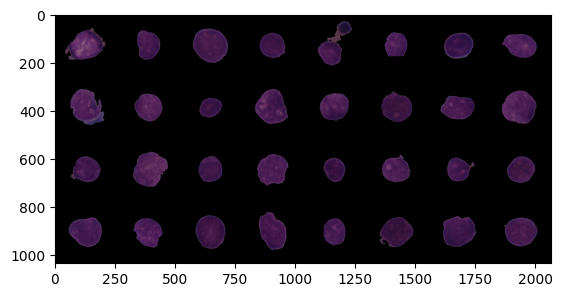

In [6]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=32)
batch, labels = next(iter(loader))

grid = make_grid(batch).permute(1, 2, 0)

plt.imshow(grid)
